# GROSS RENT EDA

In this notebook an EDA on the number of renter-housing by range of gross rent. This EDA is focused on knowing how the gross rent has changed over time in the selected US-States, and comparing the average of the median gross rent to the average income of people who has earned a bachelor degree or above.

**Gross rent** is the monthly amount of rent plus the estimated average monthly cost of utilities (electricity, gas, water and sewer) and fuels (oil, coal, kerosene, wood, etc.) ([census.gov](https://www.census.gov/data/tables/time-series/dec/coh-grossrents.html#:~:text=Both%20gross%20rents%20adjusted%20and,%2C%20wood%2C%20etc.))

## Importing python modules

In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import connectheroku
import matplotlib.pyplot as plt
from matplotlib import markers

In [350]:
sns.set_style('whitegrid')
all_shapes = list(markers.MarkerStyle.markers.keys())

## Importing credential to connect to Heroku Database

This part can be substituted reading the file gross_rent.csv available on [link](https://github.com/aliglara/capstone-c1-DA/tree/main/data)

In [351]:
credential_path = '/Users/aliglara/Documents/MyGit/apis/credential_keys.json'
cursor = connectheroku.connect_database("c1_capstone", credential_path)

# Grabbing the information required for the EDA

From the homeless population EDA, the states selected for further EDA were:

In [352]:
list_states = ['NY', 'OR', 'CA', 'WA', 'MA', 'CO', 'FL', 'AZ', 'PA', 'GA']

Reading database

In [353]:
query = ("SELECT * FROM gross_rent "
         " WHERE name_state IN (SELECT sr.name "
         "    FROM state_region AS sr WHERE abbreviation IN ('" + "','".join(list_states)  + "'))")

In [354]:
cursor.execute(query)
results = cursor.fetchall()

Converting the SQL query in to a DataFrame, it should look like importing the csv file to Excel

In [355]:
column_names = [i[0] for i in cursor.description]
df = pd.DataFrame(results, columns=column_names)

In [356]:
df = df.drop("id", axis=1)

In [357]:
df.rename({
    'year': 'Year',
    'name_state': 'State name',
    'less_than_100': 'Less than 100',
    'r100_to_r149' : '$100-$149',
    'r150_to_r199' : '$150-$199',
    'r200_to_r249' : '$200-$249',
    'r250_to_r299' : '$250-$299',
    'r300_to_r349' : '$300-$349',
    'r350_to_r399' : '$350-$399',
    'r400_to_r449' : '$400-$449',
    'r450_to_r499' : '$450-$449',
    'r500_to_r549' : '$500-$549',
    'r550_to_r599' : '$550-$599',
    'r600_to_r649' : '$600-$649',
    'r650_to_r699' : '$650-$699',
    'r700_to_r749' : '$700-$749',
    'r750_to_r799' : '$750-$799',
    'r800_to_r899' : '$800-$899',
    'r900_to_r999' : '$900-$999',
    'r1000_to_r1249' : '$1000-$1249',
    'r1250_to_r1499' : '$1250-$1499',
    'r1500_to_r1999' : '$1500-$1999',
    'r2000_to_r2499' : '$2000-$2499',
    'r2500_to_r2999' : '$2500-$2999',
    'r3000_to_r3499' : '$3000-$3499',
    'r3500_to_more' : '$3500 or more'
}, axis='columns', inplace=True)

Visualizing the dataset

In [358]:
df.head()

,Year,State name,Less than 100,$100-$149,$150-$199,$200-$249,$250-$299,$300-$349,$350-$399,$400-$449,...,$800-$899,$900-$999,$1000-$1249,$1250-$1499,$1500-$1999,$2000-$2499,$2500-$2999,$3000-$3499,$3500 or more,id_state
0,2015,New York,7166,10928,19334,75748,61802,51727,50293,52649,...,200690,207601,518411,442533,546433,229092,117541,72060,65347,36
1,2015,Oregon,1217,1764,4135,8490,5652,5137,5589,9448,...,68147,65774,113914,60251,53955,14396,4407,2519,1667,41
2,2015,Pennsylvania,6287,5890,13157,37594,23202,23559,25876,30124,...,168008,138817,250469,128872,105281,32832,10929,5683,4507,42
3,2015,Washington,2662,3985,5918,16466,9906,9940,11834,11794,...,84372,90124,178693,143812,151320,47381,15203,7876,5219,53
4,2015,Arizona,1915,1696,3570,6579,6064,6695,7442,14931,...,101873,92438,181634,104236,69295,16934,5765,3168,1794,4


Let's verify we are working with the selected US-States

In [359]:
df["State name"].unique()

array(['New York', 'Oregon', 'Pennsylvania', 'Washington', 'Arizona',
       'California', 'Colorado', 'Florida', 'Georgia', 'Massachusetts'],
      dtype=object)

Let's verify we are working in the period 2015:2020

In [360]:
df["Year"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

Let's save this information in varaibles for further analysis

In [361]:
states = list(df["State name"].unique())
years = list(df["Year"].unique())

We can create a pivot table in Excel grouping by Year and State. In this notebook, the id_state is taken because its ease to use

In [362]:
df = df.sort_values(by=["Year", "State name"])
df.set_index(["Year", "State name"], inplace=True)

In [363]:
df

Less than 100  $100-$149  $150-$199  $200-$249  $250-$299  \
Year State name                                                                 
2015 Arizona                 1915       1696       3570       6579       6064   
     California              8966       9636      14664      39713      64298   
     Colorado                2594       2570       3090      11771       6278   
     Florida                 3166       4898      13553      25641      19440   
     Georgia                 1383       3167       8789      17889      17513   
     Massachusetts           5941       5641       7505      22932      26360   
     New York                7166      10928      19334      75748      61802   
     Oregon                  1217       1764       4135       8490       5652   
     Pennsylvania            6287       5890      13157      37594      23202   
     Washington              2662       3985       5918      16466       9906   
2016 Arizona                 2241       1892       3955       8389       7350   
     California             13093       7938      12554      34644      67886   
     Colorado                2330       1910       3090       8790       5669   
     Florida                 3622       5089      14625      24276      20923   
     Georgia                 3120       4197       9482      16273      14384   
     Massachusetts           3937       4729       8977      25135      27091   
     New York                6276       7381      18429      77562      57835   
     Oregon                   664       1031       3817       7797       4542   
     Pennsylvania            6186       5961      11958      32349      27068   
     Washington              1489       2618       4436      15965      10495   
2017 Arizona                 2447       2117       2679       7428       4773   
     California              9168       8297      13556      32030      68632   
     Colorado                2282       1066       2434      11746       5397   
     Florida                 3147       4933      11812      27775      17605   
     Georgia                 1812       5065       8930      19038      15123   
     Massachusetts           4768       6282       6178      24233      25686   
     New York                5600       8020      18055      85064      56882   
     Oregon                   646       1392       3093       6775       4318   
     Pennsylvania            8196       5043      11055      38412      22751   
     Washington              2802       1943       5535      15128       9642   
2018 Arizona                 1169        642       2060       8809       4698   
     California              9375       6599      10145      32886      68943   
     Colorado                3147       1431       3413      10885       7761   
     Florida                 3190       3079      12705      23588      20373   
     Georgia                 3567       3927       9005      14968      15021   
     Massachusetts           4878       5708       5948      19070      29480   
     New York                4850       9061      17679      77901      59234   
     Oregon                  1109       1250       2687       9319       5852   
     Pennsylvania            7591       5930      10086      31316      21158   
     Washington              2229       1360       5107      12852       7820   
2019 Arizona                  958       1780       4295       8883       7549   
     California              8841       9856      10284      25581      76093   
     Colorado                1933       1083       2021       9015       6615   
     Florida                 2594       2845       9914      28478      18051   
     Georgia                 1980       3820       6402      17147      13725   
     Massachusetts           2857       5237       6844      18257      30299   
     New York                4710      10406      18684      69770      71247   
     Oregon                  1066        993       

As a reminder, this dataset contains the number of renter-housing units for range of gross rent by state. Therefore, it is possible to show how the number of units has changed over time using a barplot.

# Visualization of distribution of renter housing units

A Barplot is requiered a categorical variable on the x-axis, in our case, gross rent prices range. On the y-axis, a numerical value is needed which it will be the number of housing units.

The next figure shows a set of 6 barplots (one for each year) for each state.

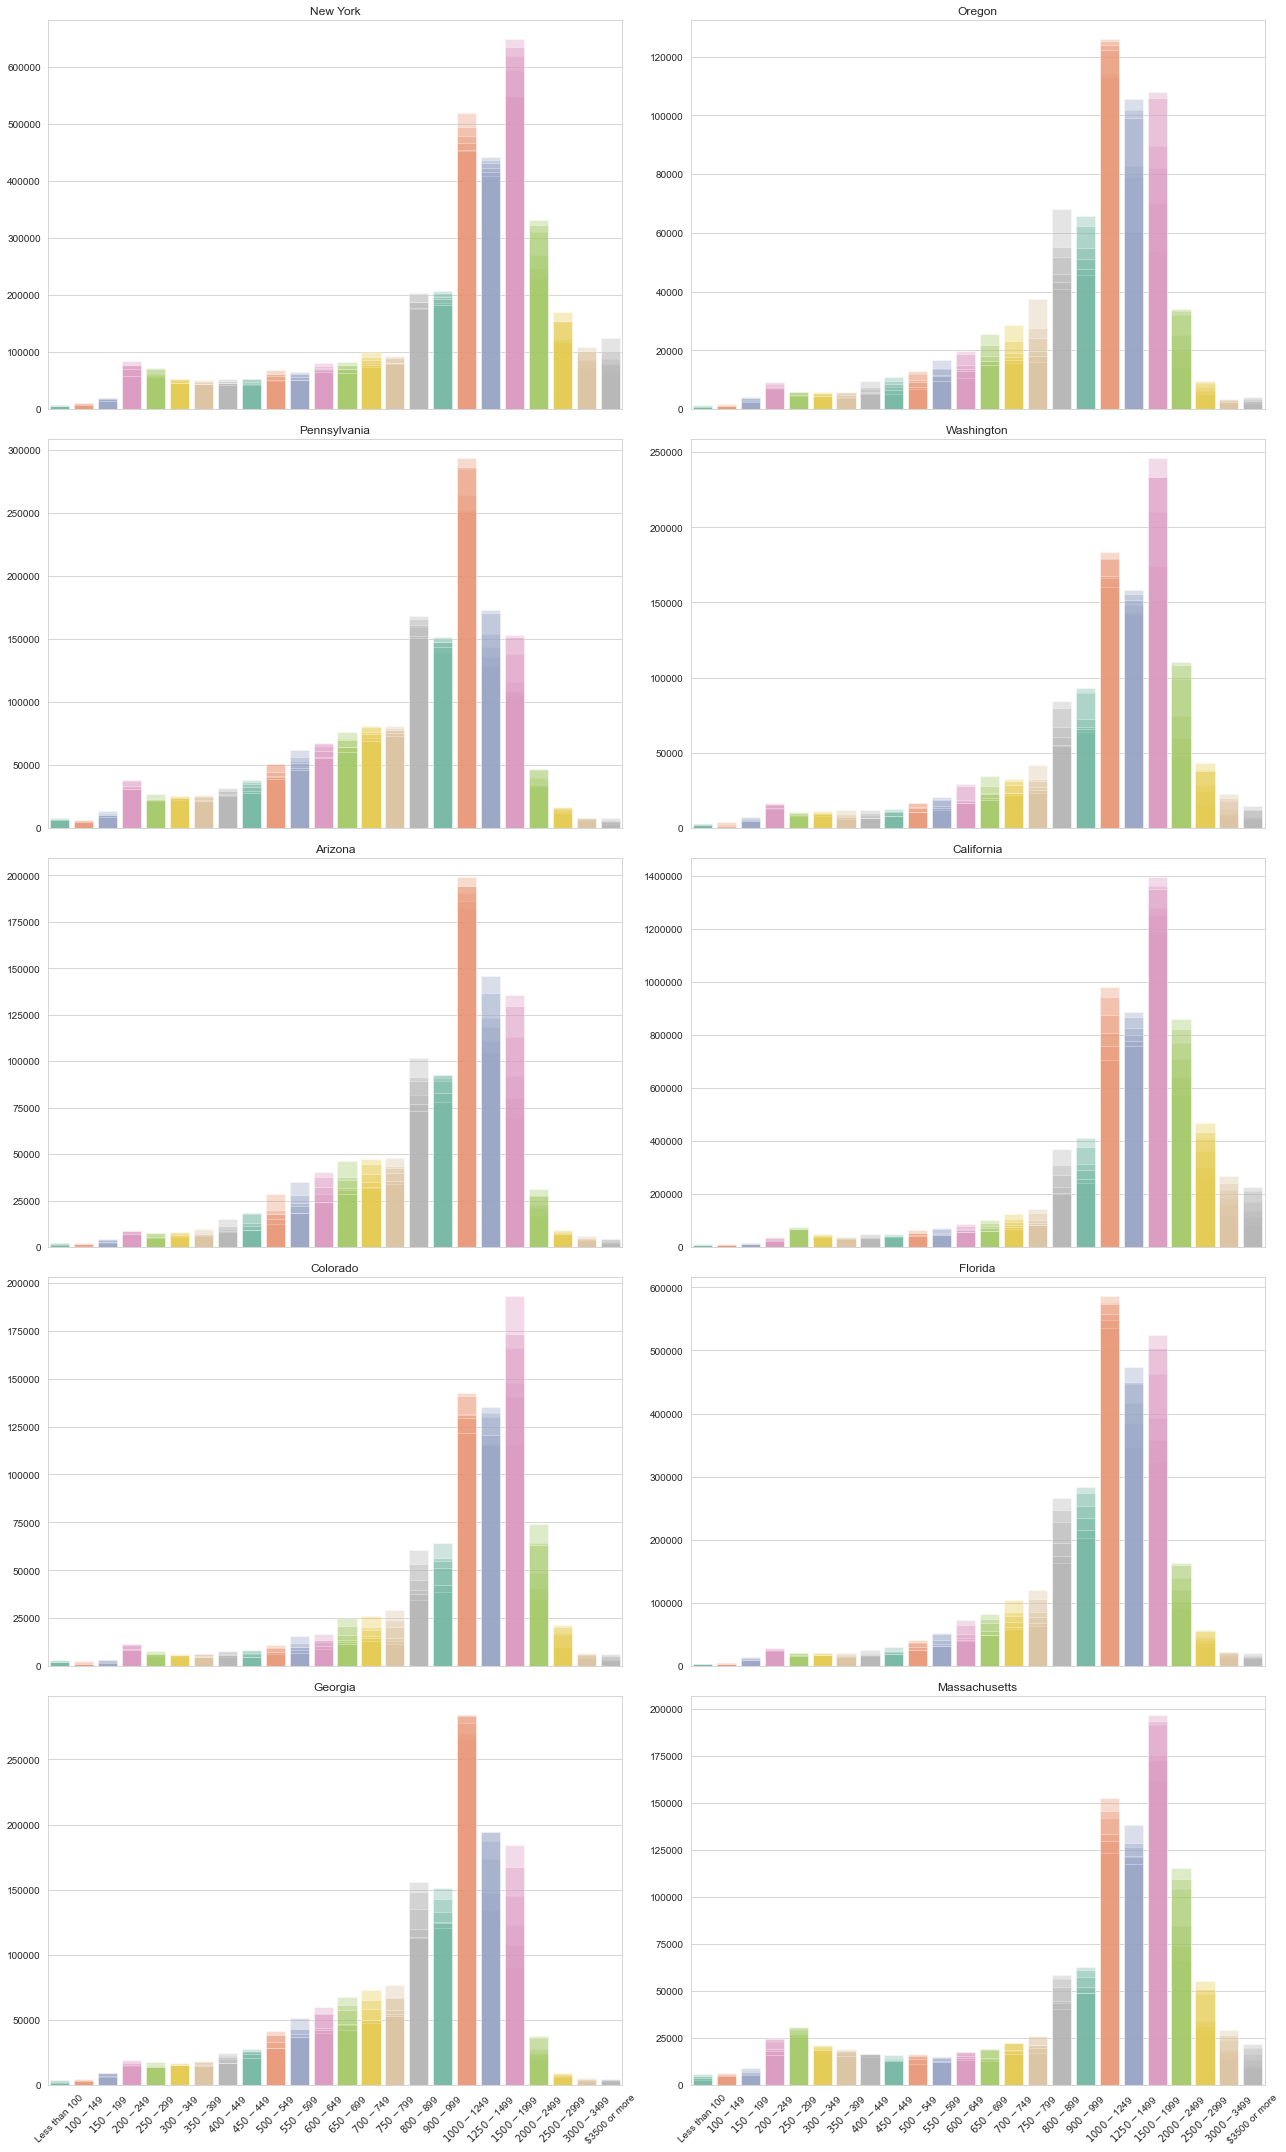

In [364]:
# Create the figure
_, axes = plt.subplots(5, 2, figsize=(18,30), sharex='col')

for state, ax in zip(states, axes.ravel()):
    # The data has to be reformated for the barplot seaborn
    subdata = df.loc(axis=0)[:, state]
    subdata.reset_index(inplace=True)
    subdata = subdata.drop(["id_state", "State name"], axis=1)
    subdata = subdata.T
    subdata.columns = subdata.iloc[0]
    subdata = subdata.drop("Year", axis=0)
    
    for year in years:
        g = sns.barplot(x=subdata.index, y=subdata[year].values,
                        palette = 'Set2',
                        ax=ax, alpha=0.35)
        g.set_title(state)
        g.tick_params(labelrotation=45, axis='x')
        g.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()
    

Based on the picture, the most of the renter housing units are in the range of $750 to $2500. However, it is difficult to observe if the number of units has changed over time.

## Cumulative Distribution of renter housing units
Let's plot a cumulative distribution by state by year

In [365]:
# Back to the original format of the data
df.reset_index(inplace=True)

# Remove id_state because we don't need it
df1 = df.drop("id_state", axis=1)

# Calculation of the portion of each rent cost range
df1 = df1.iloc[:,2:].apply(lambda x: x/x.sum()*100, axis=1)

# Calculation of teh cumulative sum
df1 = df1.apply(lambda x: np.cumsum(x), axis=1)

In [366]:
# Let's create a dataframe
df1 = pd.concat([df[["Year","State name"]], df1], axis=1)
df1.set_index(["Year", "State name"], inplace=True)

In [367]:
# How the result looks like
df1.head()

Less than 100  $100-$149  $150-$199  $200-$249  $250-$299  \
Year State name                                                              
2015 Arizona          0.215261   0.405905   0.807201   1.546733   2.228375   
     California       0.154824   0.321218   0.574434   1.260194   2.370486   
     Colorado         0.356397   0.709497   1.134040   2.751291   3.613844   
     Florida          0.122661   0.312424   0.837510   1.830921   2.584087   
     Georgia          0.104950   0.345279   1.012237   2.369752   3.698735   

                 $300-$349  $350-$399  $400-$449  $450-$449  $500-$549  ...  \
Year State name                                                         ...   
2015 Arizona      2.980946   3.817486   5.495848   7.505027  10.686059  ...   
     California   3.161580   3.796314   4.661401   5.508254   6.637143  ...   
     Colorado     4.139646   5.024456   6.038690   7.095790   8.606699  ...   
     Florida      3.272203   4.032265   5.038152   6.211254   7.807625  ...   
     Georgia      4.956537   6.314052   8.024359   9.972340  12.915710  ...   

                 $750-$799  $800-$899  $900-$999  $1000-$1249  $1250-$1499  \
Year State name                                                              
2015 Arizona     35.125228  46.576560  56.967324    77.384425    89.101377   
     California  15.838225  22.212999  29.325873    46.258762    61.545346   
     Colorado    24.200099  32.500550  41.319658    60.910090    76.869642   
     Florida     24.538521  34.869639  45.868184    68.126287    81.572040   
     Georgia     37.164083  49.009732  60.464571    80.602075    90.822485   

                 $1500-$1999  $2000-$2499  $2500-$2999  $3000-$3499  \
Year State name                                                       
2015 Arizona       96.890684    98.794200    99.442232    99.798340   
     California    82.040137    91.935354    96.476864    98.573844   
     Colorado      92.696884    97.492031    98.790531    99.341614   
     Florida       94.100395    97.600059    98.806674    99.548720   
     Georgia       97.703250    99.229155    99.649637    99.819089   

                 $3500 or more  
Year State name                 
2015 Arizona             100.0  
     California          100.0  
     Colorado            100.0  
     Florida             100.0  
     Georgia             100.0  

[5 rows x 24 columns]

## Cumulative Distribution plots

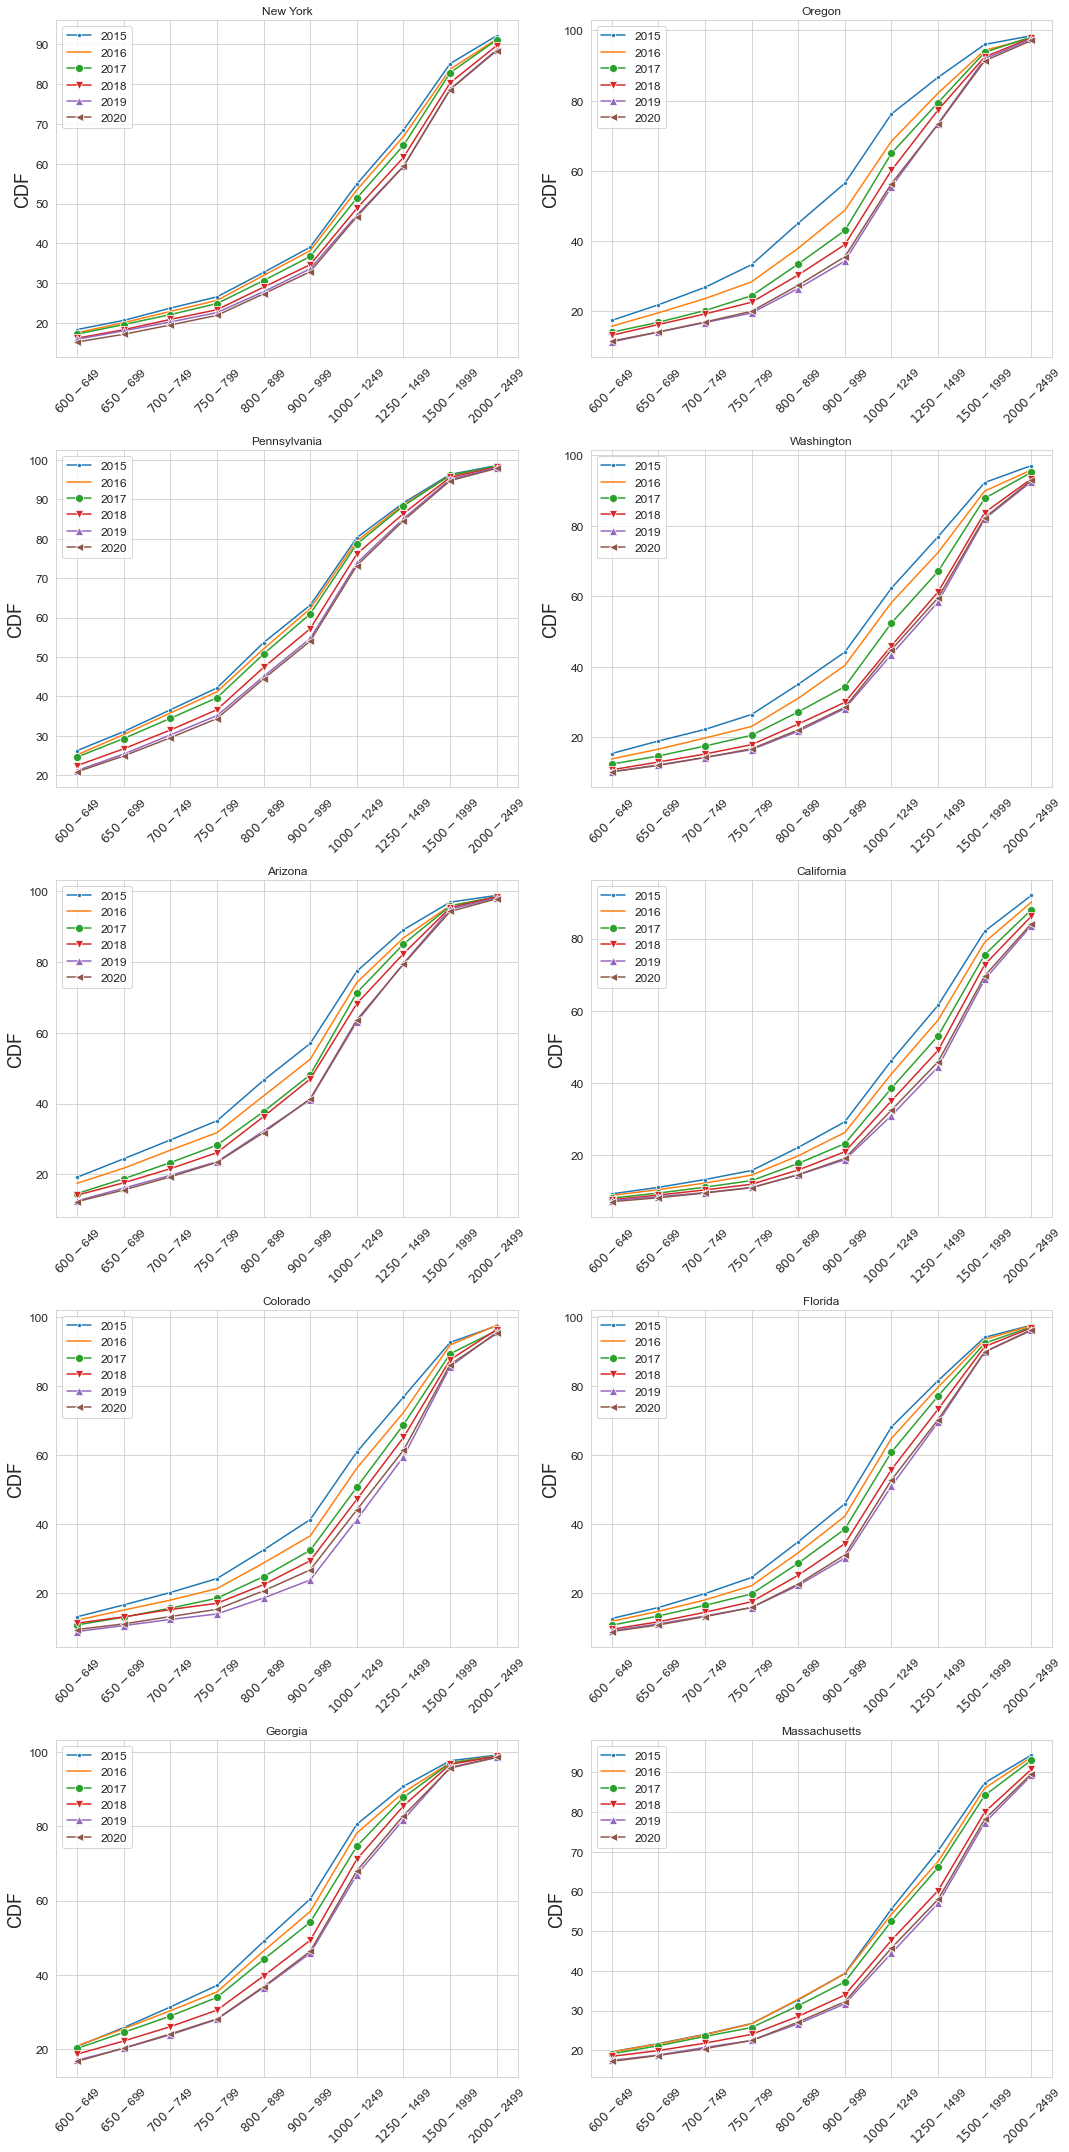

In [368]:
_, axes = plt.subplots(5, 2, figsize=(15,30))

for state, ax in zip(states, axes.ravel()):
    for i, year in enumerate(years):
        g = sns.lineplot(data=df1.loc[(year, state)][11:-3],
                         palette='colorblind', ax=ax, label=year,
                         marker=all_shapes[i],
                         markersize=8)
        g.set_title(state)
        g.set_ylabel("CDF", fontsize=18)
        g.tick_params(axis='y', labelsize=12)
        g.tick_params(labelrotation=45, axis='x', labelsize=12)
        g.ticklabel_format(style='plain', axis='y')
        g.legend(fontsize='large')

plt.tight_layout()
plt.show()


There are several takeaways from there.
1. In the universe of the 10 top states where there has been a significant change in the homeless population, there are more housing units with rent costs between $750 to $2000.
2. California has the highest number of housing units for rent in the USA.
3. The distribution of housing units for rent is similar in California and New York.  In both states, the homeless population has increased over the last three years.
4. The total of units has decreased since 2015 in all states. However, in 2018-2020 (an increase in the homeless population), rental units have been almost the same in all states.
5. Interestingly, Florida's distribution of renter housing units is similar to California. Still, in Florida, the homeless population has decreased compared to California.


In [369]:
# As Housing units is a discrete value
pivoTable = pd.pivot_table(data=df.iloc[:,1:-1],
                         index="State name", aggfunc=np.median).round()

In [371]:
pivoTable[df.columns[2:-1]].T

State name,Arizona,California,Colorado,Florida,Georgia,Massachusetts,New York,Oregon,Pennsylvania,Washington
Less than 100,1715.0,9272.0,2306.0,3156.0,2122.0,4352.0,5592.0,906.0,6618.0,2423.0
$100-$149,1738.0,8118.0,1352.0,4016.0,3874.0,5439.0,8540.0,1198.0,5910.0,1788.0
$150-$199,3134.0,11419.0,2762.0,12258.0,8860.0,6511.0,18242.0,3454.0,10590.0,5321.0
$200-$249,7908.0,32458.0,9950.0,25448.0,16710.0,21001.0,76655.0,7630.0,32976.0,15546.0
$250-$299,5663.0,68259.0,6220.0,18746.0,14702.0,28286.0,60518.0,5224.0,22730.0,9706.0
$300-$349,6551.0,42228.0,5838.0,17684.0,15796.0,19613.0,50670.0,5123.0,23743.0,9838.0
$350-$399,6987.0,35230.0,5786.0,18284.0,16859.0,17771.0,46072.0,5128.0,24732.0,8403.0
$400-$449,9632.0,39834.0,6028.0,18352.0,20919.0,16514.0,45856.0,6384.0,28177.0,7951.0
$450-$449,12169.0,41077.0,6598.0,23322.0,25592.0,13608.0,46050.0,7898.0,33589.0,10876.0
$500-$549,17790.0,53875.0,8499.0,33305.0,35740.0,15025.0,59886.0,9594.0,43011.0,13562.0
